<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_121_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 121: kNN Classification I

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|kNN Classification I |
|||
|**Class Description**|In this class, a student will learn a new supervised machine learning algorithm called k-nearest neighbour (kNN)|
|||
|**Class**|C121|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Understand the concept of kNN classification|
||Learn various distance functions used in kNN|
||Perform EDA on water quality dataset|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Teacher-Student Activities

In the previous classes, we  explored many supervised and unsupervised machine learning algorithms. Some algorithms are simple summations
while others require complex calculations. It is often hard and confusing to decide the algorithm is more suitable for our model.

In today's class, we will start exploring a simple algorithm called **k‐Nearest Neighbours (kNN)**  that is well equipped and has the capability to outperform many complex algorithms. In this process, we will also address a new problem statement. Let us look at the problem statement first.






---

#### Problem Statement

Safe drinking water is essential for every forms of life on earth. for public health. The United Nation (UN) and other countries declared access to safe drinking water as a fundamental human right. This is important as a health and development issue at a national, regional, and local level.

You are provided with a dataset consisting of water quality metrics for 3276 different water bodies. Your job is to  create a model to determine if the sample tested from the water body is fit for human consumption or not.

Following are the attributes of this dataset:


1. `ph`: The pH value indicates the acidic or alkaline condition of water status. The pH of pure water is 7. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.

2. `Hardness`: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels.

3. `Solids`: Also known as TDS (total dissolved solids). Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, etc. These minerals produced un-wanted taste and diluted colour in appearance of water.  The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l prescribed for drinking purposes.

4. `Chloramines`: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per litre ($mg/L$ or 4 parts per million (ppm)) are considered safe in drinking water.

5. `Sulfate`: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.  Sulfate concentration in seawater is about 2,700 milligrams per litre ($mg/L$). It ranges from 3 to 30 $mg/L$ in most freshwater supplies.


6. `Conductivity`: Pure water is not a good conductor of electric current rather’s a good insulator.  Electrical conductivity (EC) measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 micro siemens per centimetre ($\mu S/cm$).

7. `Organic_carbon`: Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water.

8. `Trihalomethanes`: Trihalomethanes (THMs) are chemicals that may be found in water treated with chlorine. THM levels up to 80 ppm is considered safe in drinking water.

9. `Turbidity`: The turbidity of water depends on the quantity of solid matter present in the suspended state. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. `Potability`: Indicates if water is safe for human consumption where `1` means Potable and `0` means Not potable.


**Dataset Credits:** https://www.kaggle.com/adityakadiwal/water-potability


**Dataset Link:** https://s3-whjr-v2-prod-bucket.whjr.online/69e55114-dbd8-46c8-9c0a-4bdf19008d79.csv




In [ ]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

water_df = pd.read_csv("https://s3-whjr-v2-prod-bucket.whjr.online/69e55114-dbd8-46c8-9c0a-4bdf19008d79.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


We can see that this is a binary classification problem statement where the target label `Potability` can have only two possible values: `0` and `1`. Hence, we will build a model that can predict quality of a water sample using a classification algorithm called kNN.


Let's first understand kNN classification in detail using a simple example. Thereafter, we will solve the above problem statement.


---

#### Activity 1: Understanding kNN


 The k-Nearest Neighbours (kNN) is a simple algorithm that is used for both classification and regression problems in Machine Learning. Let us first understand how kNN classification works  using a simple example. We will cover kNN regression in the upcoming lessons.

Imagine that we were presented with two features of balls i.e `size` and `weight` and a target label `category` (`0` = tennis ball and `1` = soccer ball):


|size|weight|category|
|-|-|-|
|10|150|0|
|11|190|0|
|15|190|0|
|12|160|0|
|18|200|1|
|20|220|1|
|21|230|1|
|22|245|1|

Let us create a two-dimensional numpy array storing the size and weights of balls and a separate numpy array that contains the category values.


In [ ]:
# S1.1: Create a 2D numpy array of balls size and weights.
# Create an array consisting of category values.

balls_arr = np.array([[10, 11, 15, 12, 18, 20, 21, 22],
                      [150, 190, 190, 160, 200, 220, 230, 245]])
category_arr = np.array([0, 0, 0, 0, 1, 1, 1, 1])


Create a scatter plot with size on the $x$-axis and weight on the $y$-axis and colour code the data points based on the categories of balls.  

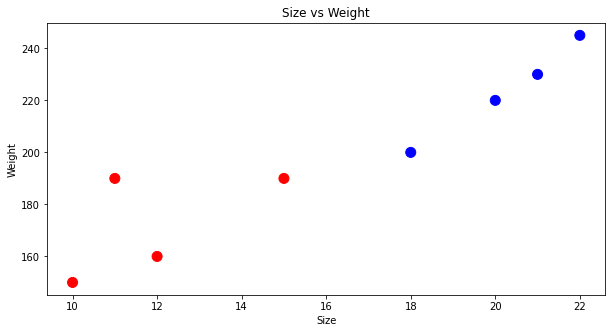

In [ ]:
# S1.2: Create a scatter plot for size vs weight.
plt.figure(figsize = (10, 5))
color_arr = np.array(['r', 'b'])

plt.scatter(balls_arr[0], balls_arr[1], s = 100,  c = color_arr[category_arr])
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Size vs Weight')
plt.show()

Suppose there is a new ball (marked as **X**) whose size is `16` and weight is `200` as seen in the figure below:

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/572dd9e9-c093-4b5f-b6a2-7586493aace1.png"/>

`Fig 1.1: Predicting label of new data point`
</center>

Our task is to classify this new ball into either  class <font color = red><b>$0$ </b></font> or   class <font color = blue><b>$1$ </b></font>.

Suppose the value of $k$ is 3. The kNN algorithm starts by calculating the distance of point **X** from all the points. It will then find the 3 nearest points having least distance to point **X**. This is shown in the figure below. The three nearest points have been encircled.

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/2bf6a3c6-9ff2-4d9b-b89a-c9235b852c6a.png"/>

`Fig 1.2: When k = 3`
</center>

The final step of the kNN algorithm is to assign new point **X** to the class to which majority of the three nearest points belong. From the figure above, we can see that two of the three nearest points belong to class <font color = blue><b>$1$ </b></font> while one belongs to the class <font color = red><b>$0$ </b></font>. Therefore the new data point will be classified as <font color = blue><b>$1$ </b></font> i.e the new ball is a soccer ball.

Hence in kNN, $k$ is the number of nearest neighbours. $k$ is generally an odd number if the number of classes is 2.

The simplest case of kNN algorithm is when $k$ = 1.  In this case, we find the only 1 closest point to point **X** and then the label of the nearest point is assigned to **X**. Thus, for balls example, if $k$ = 1 then the predicted class would be  <font color = red><b>$0$ </b></font> as seen in the figure below:

<center>
<img src= "https://s3-whjr-v2-prod-bucket.whjr.online/111927ea-e7bb-4098-8f18-4d77ec60832a.png"/>

`Fig 1.3: When k = 1`
</center>

Hence, the number of neighbours $k$ is the core deciding factor in kNN. Thus, kNN classification has the following basic steps:
<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/63318078-30b6-4ed6-a88c-7d0cc1baea6d.png"/></center>

To find the distance between points, we use various distance measures in which Euclidean distance function is the most widely used one. Let us learn other distance functions that can be used in kNN.

---

#### Distance Functions

To measure the distance between points $A$ and $B$ in a feature space, the Euclidean distance function is the most widely used one.

However, depending on the context of the problem several distance metrics can be used.

Let $A$ and $B$  are represented by feature vectors
$A = (x_1, x_2, …, x_n)$ and $B = (y_1, y_2, …, y_n)$,  where $n$ is the dimensionality of the feature space.

**1. Manhattan Distance:**

Manhattan distance is calculated as the sum of the absolute differences between the two vectors.

\begin{equation}
d(A, B) = \sum _{i=1}^n |x_i - y_i|
\end{equation}

Thus, the Manhattan distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ is given by  $|x_1 – x_2| + |y_1 – y_2|$.

For example, consider two data points $A =(1, 2)$ and $B =(3, 4)$,

The Manhattan distance between these two points is calculated as:

\begin{equation}
d(A, B) = |3 -1|+|4-2| = 4
\end{equation}

**2. Euclidean  Distance:**

The Euclidean distance between two points is the length of a line segment between the two points.

<center>
<img src = https://s3-whjr-v2-prod-bucket.whjr.online/f57e2015-ba39-4646-933f-3cbaa2dac4df.png height=500></center>

The **Euclidean Distance** between  points  $A (x_1 , y_1)$, and $B (x_2 , y_2)$ can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem:

\begin{align}
  d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }
\end{align}

For example, the Euclidean distance between $(1,2)$ and $(3, 4)$ is:
  
  $\sqrt{(3-1)^2 + (4-2)^2}=\sqrt{4 + 4} =\sqrt{8} = 2.828 $

**3. Minkowski Distance:**

It is a generalisation of the Euclidean distance and the Manhattan distance.

$$ d(A, B) = \sqrt[p]{{(x_1-y_1)}^p\ +\ {(x_2-y_2)}^p\ +\ ...\ +\ {(x_n-y_n)}^p}
$$

The value of $p$ in Minkowski Distance is set based on experimentation. The usual value of $p$ is either `2`, `3` or `4` for most problems. The exact value depends on the applications.
- When $p = 1$, Minkowski distance is same as Manhattan distance.
- When $p = 2$, Minkowski distance is same as Euclidean distance.

**4. Hamming Distance:**

 It is used for categorical variables. If the value of variable $x$ and the value of variable $y$ are the same, the distance $d_H$ will be equal to 0. Otherwise $d_H$ will be equal to 1.

\begin{align}
  d_H(x, y)= \sum_{i = 1}^k |x_i - y_i|
\end{align}
 - If $x = y$, then $d_H = 0$
 - If $x \neq y$, then $d_H = 1$


For example:

|Fruit|Sphere|Sweet|Sour|Crunchy|
|-|-|-|-|-|
|Apple|Yes|Yes|No|Yes|
|Banana|No|Yes|No|No|

Since each object is represented by 4 variables, we can say that each object has 4 dimensions. Thus, coordinate of Apple is (1, 1, 0, 1) and coordinate of Banana is (0, 1, 0, 0).

|Fruit|Sphere|Sweet|Sour|Crunchy|
|-|-|-|-|-|
|Apple|1|1|0|1|
|Banana|0|1|0|0|
|Is different|Yes|No|No|Yes|

Since there are 2 digits different here, we can say that the hamming distance between Apple and Banana is 2.


Now that we have understood the basic idea behind kNN classification, let us proceed with the water quality prediction problem statement.



---

#### Activity 2:  Data Preprocessing

Let's find out the total number of rows and columns, data types of columns and missing values (if exist) in the `water_df` DataFrame.


In [ ]:
# S2.1: Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


There are 3276 rows and 10 columns in the dataset. Also, all the columns are numeric, hence feature encoding is not needed.

Let us determine the columns having missing values using `isnull().sum()` function.

In [ ]:
# S2.2: Check missing values using the 'isnull().sum()' function.
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Also, determine the percentage of missing values in each column of the DataFrame.

In [ ]:
# S2.3: Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

`Sulfate` has highest percentage of missing values in the dataset, followed by `ph` and `Trihalomethans`.

Now, let's replace the null values of the columns with their median values as mean gets pulled in the direction of outliers. Again check whether there are still any null values in the dataset.

In [ ]:
# S2.4: Handle missing value with median of features
water_df["ph"].fillna(value = water_df["ph"].median(), inplace = True)
water_df["Sulfate"].fillna(value = water_df["Sulfate"].median(), inplace = True)
water_df["Trihalomethanes"].fillna(value = water_df["Trihalomethanes"].median(), inplace = True)

After treating the missing values, check the percentage of missing values of the dataset.

In [ ]:
# S2.5: Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

Now that our DataFrame does not contain any missing values, let us perform exploratory data analysis and analyse the patterns in the dataset.

---

#### Activity 3: EDA and Data Preparation

For our dataset, the column `Potability` is the target variable and other columns except `Potability` are the feature variables.
Let us create a countplot to display the count of  each target class.

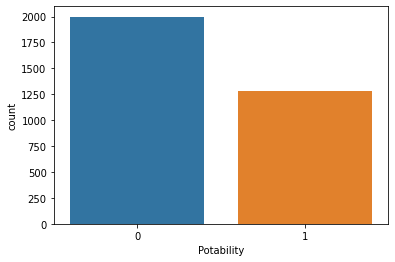

In [ ]:
# S3.1: Create a countplot for target class.
sns.countplot(water_df['Potability'])

Let us now check the feature distribution and outliers.

Use `boxplot()` function of `seaborn` module and pass the target variable `Potability` as  $x$-axis values and the other features as  $y$-axis values to create boxplots for all the features. Use subplots to display these boxplots.


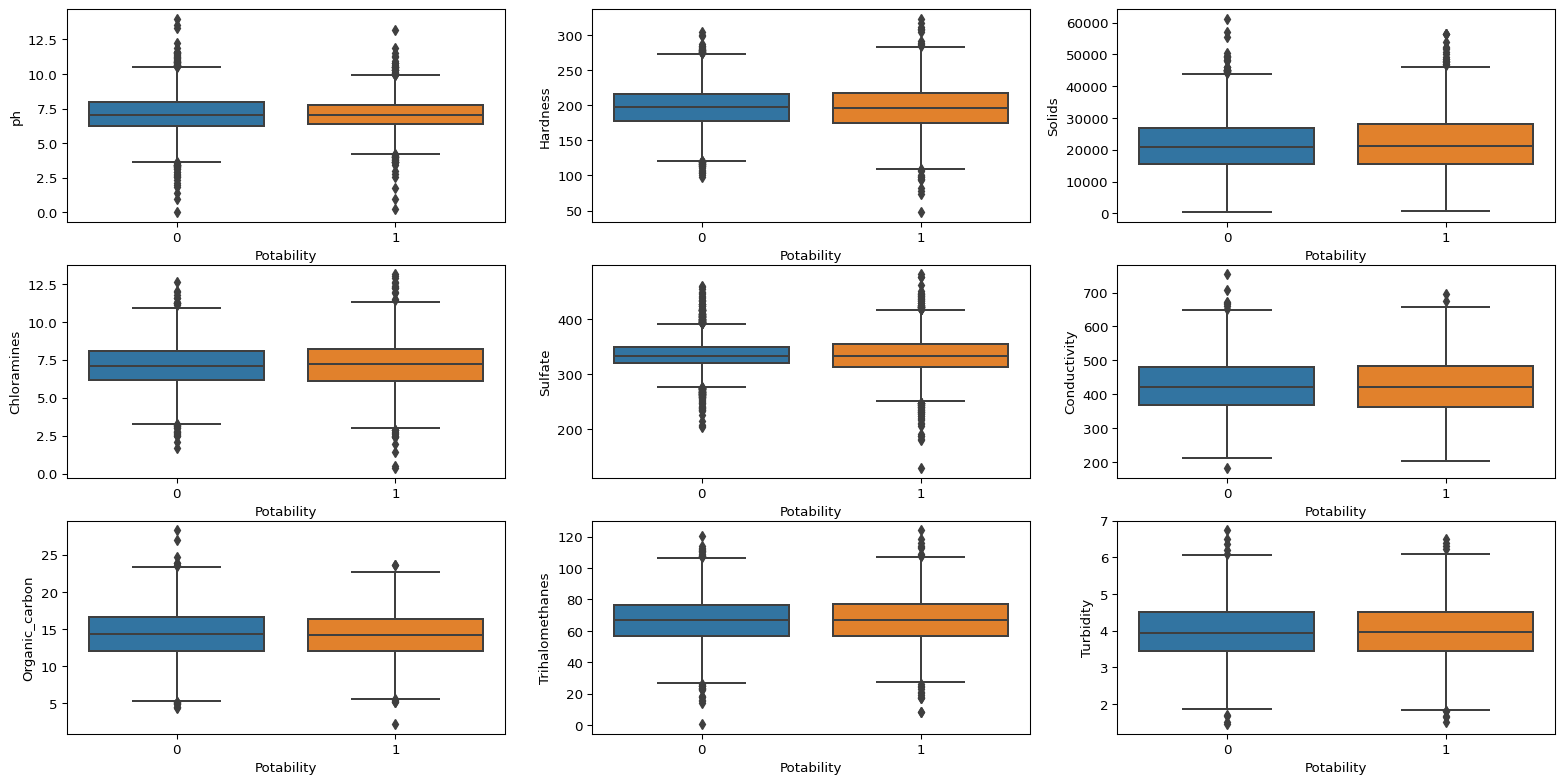

In [ ]:
# S3.2: Create boxplots for 'water_df' columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), dpi = 96, sharex = False)
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(x = 'Potability', y = column, data = water_df, ax = axis[i, j])
    count = count + 1

plt.show()


Here we see there are no significant outliers for any of the features.

Let us plot the histograms for all the features to understand the distribution of values of these features. Use subplots to display these histograms.

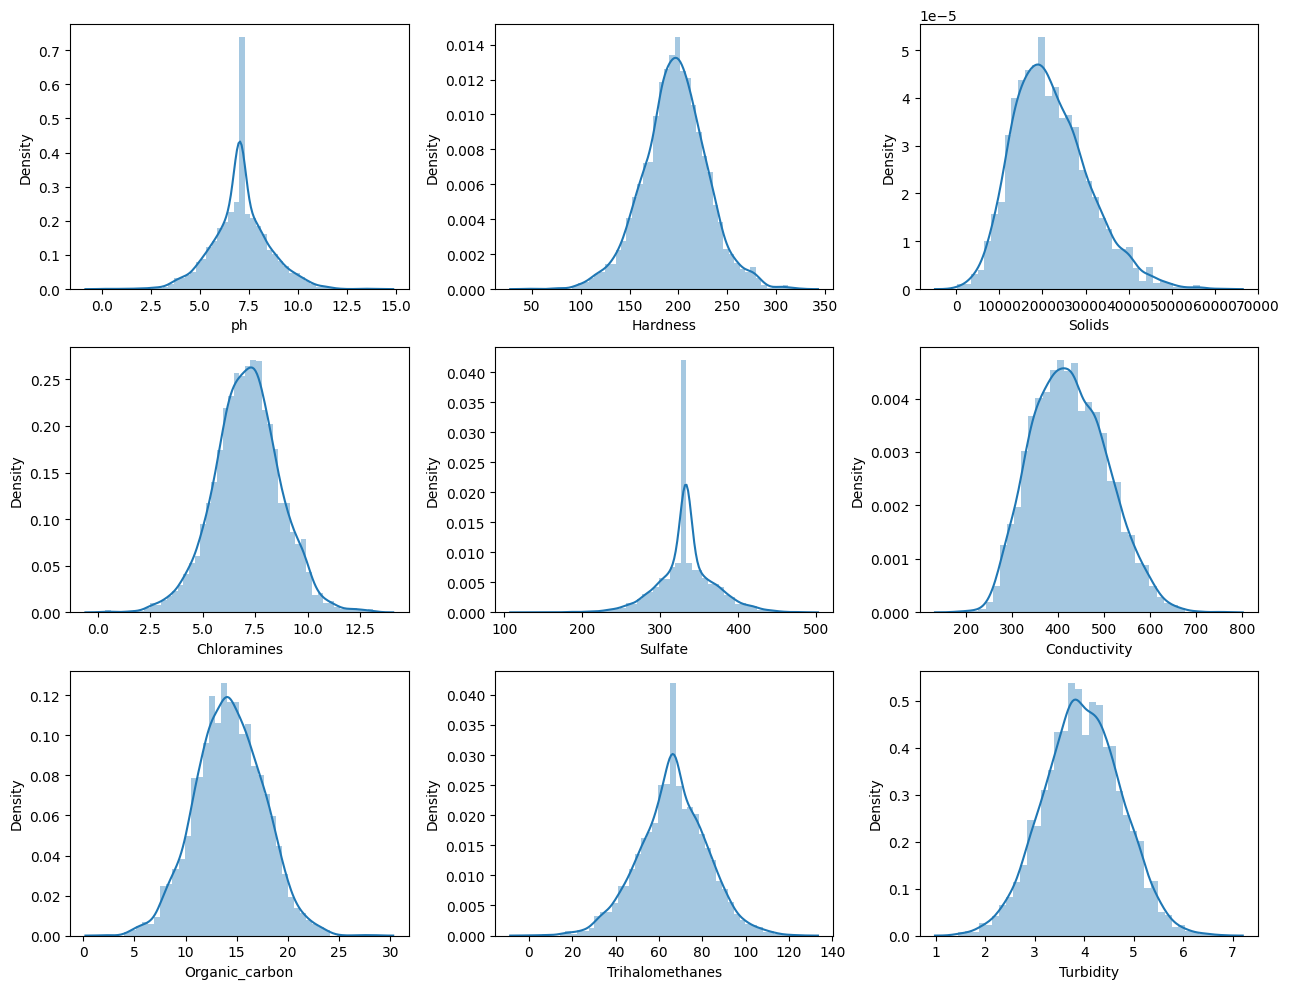

In [ ]:
# S3.3: Create histogram for numeric columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 10), dpi = 100)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]      # Fetching the current column and all rows of that column.

    sns.distplot(column, hist = True, ax = axis[i, j])
    count = count + 1
    fig.tight_layout()

plt.show()

It's good to notice that our features are quite normally distributed. Next, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the variables and plot a heat map.

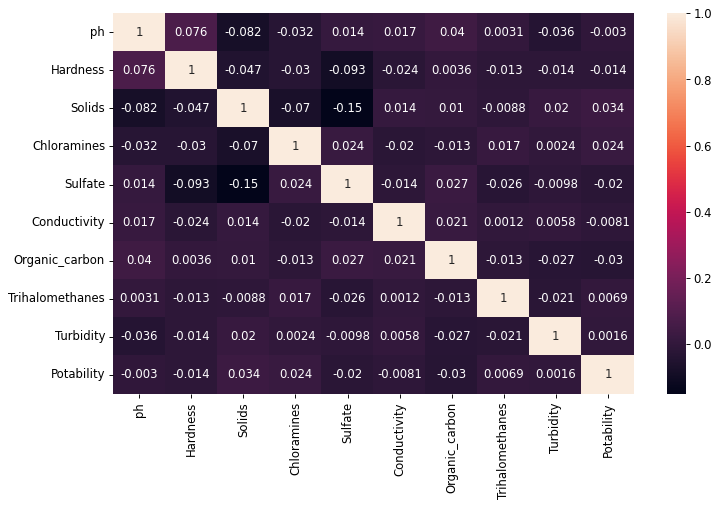

In [ ]:
# S3.4: Check the correlation of features
corr_df = water_df.corr()
plt.figure(figsize = (10, 6), dpi = 84)
sns.heatmap(corr_df, annot = True)
plt.show()

From the above correlation heatmap, we can observe that none of the features exhibits a strong correlation with the target variable.

Let us now create two separate DataFrames, one containing the feature variables and other containing the target variable.

In [ ]:
# S3.5: Split the data into dependent and independent features
features_df = water_df.drop(['Potability'], axis = 1)
target_df = water_df['Potability']
features_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Use `StandardScaler` to scale the feature values.

In [ ]:
# S3.6: Normalise the column values.
# Import 'StandardScaler' from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Make an object of StandardScaler
standard_scaler = StandardScaler()

# Fit and Transform the DataFrame
scaled_features = standard_scaler.fit_transform(features_df)

# Make a new DataFrame with the normalized values
X_scaled = pd.DataFrame(scaled_features)
X_scaled.columns = features_df.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786


Hence, our dataset is now ready for model building and prediction.

Let us split the scaled dataset into train and test sets using `train_test_split()` function. Also, set `stratify = target_df` inside the `train_test_split()` function to obtain a balanced train/test dataset consisting of samples from each target label.


In [ ]:
# S3.7: Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size = 0.3,
                                                    random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2293, 9)
Shape of X_test: (983, 9)
Shape of y_train: (2293,)
Shape of y_test: (983,)



We will stop here. In the next class, we will perform kNN classification using `sklearn` module and evaluate the performance of the model.

---

## Additional Activities

The activities starting from this point are optional. Please do these activities ONLY if you have time to spare in the class. Otherwise, skip to the Wrap-Up section. The additional activities will not be available in the class copy of the notebook. You will have to manually add these activities in the class copy by adding new text and code cells.

Moreover, you don't have to do all the additional activities. Depending on the availability of time in a class, you can choose the number of additional activities to perform from this collection.

---

#### Activity 1: Building Logistic Regression Model

Let's build a Logistic Regression model on the train set by following the steps listed below:

1. Import `LogisticRegression` class from the `sklearn.linear_model` module.
2. Create an object of the `LogisticRegression` class, say `log_reg` and pass `n_jobs = -1` and `random_state = 42` as inputs to its constructor.
3. Call the `fit()` function of the `LogisticRegression` class on the object created and pass `X_train` and `y_train` as inputs to the function.
4. Call the `predict()` function on the `log_reg` object with `X_test` as the input parameter.

5. Print the train and test set accuracy scores using `score()` function.



In [ ]:
# S1.1: Deploy Logistic Regression model.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(n_jobs = -1, random_state = 42)

# Fit the model and perform prediction.
log_reg.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the model.
print("Train set accuracy:", log_reg.score(X_train, y_train))
print("Test set accuracy:", log_reg.score(X_test, y_test))

Train set accuracy: 0.6096816397732229
Test set accuracy: 0.6103763987792472


Both train and test set accuracy is around $61\%$ which is not a fair accuracy score. However, let's make the predictions on the test set and compare them with the actual labels.

In [ ]:
# S1.2: Make predictions on the test dataset by using the 'predict()' function.
log_y_pred = log_reg.predict(X_test)
log_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Let's print the confusion matrix to get an in-depth overview of the classifier performance.

In [ ]:
# S1.3: Display the confusion_matrix.
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, log_y_pred)

array([[600,   0],
       [383,   0]])

As you can see, the value in the second row and the second column is `0` which means the Logistic Regression Classifier model has failed to detect class `1` values.

Hence, this will lead to undefined precision, recall and f1-score values. Let's verify it by printing the classification report.

In [ ]:
# S1.4: Print the classification report for Logistic Regression classifier
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



You may observe that the Logistic regression classifier is working well for target label `0`, but not for label `1`.  One of the reason for this may be an imbalanced dataset. In the next class, we will explore this in more detail.

---

#### Activities


**Teacher Activities:**

1. kNN Classification I (Class Copy)

   Link on Panel
   
2. kNN Classification I (Reference)

   Link on Panel

---